In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,RocCurveDisplay
from sklearn import tree

**Importing the dataset**

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [6]:
x=df.drop(columns=['User ID','Gender','Purchased'])
y=df['Purchased']
print(x.shape,y.shape)

(400, 2) (400,)


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

**Feature Scaling**

In [8]:
sca=StandardScaler()
x_train=sca.fit_transform(x_train)
x_test=sca.transform(x_test)

**Fitting Decision Tree Classification to the Training set**

In [9]:
dmodel = tree.DecisionTreeClassifier()
dmodel.fit(x_train,y_train)

DecisionTreeClassifier()

**Predicting the Test set results**

In [10]:
y_pred=dmodel.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1])

**Making the Confusion Matrix**

In [11]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[47,  6],
       [ 4, 23]])

In [12]:
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,47,6,53
1,4,23,27
All,51,29,80


**Visualising the Training set results**

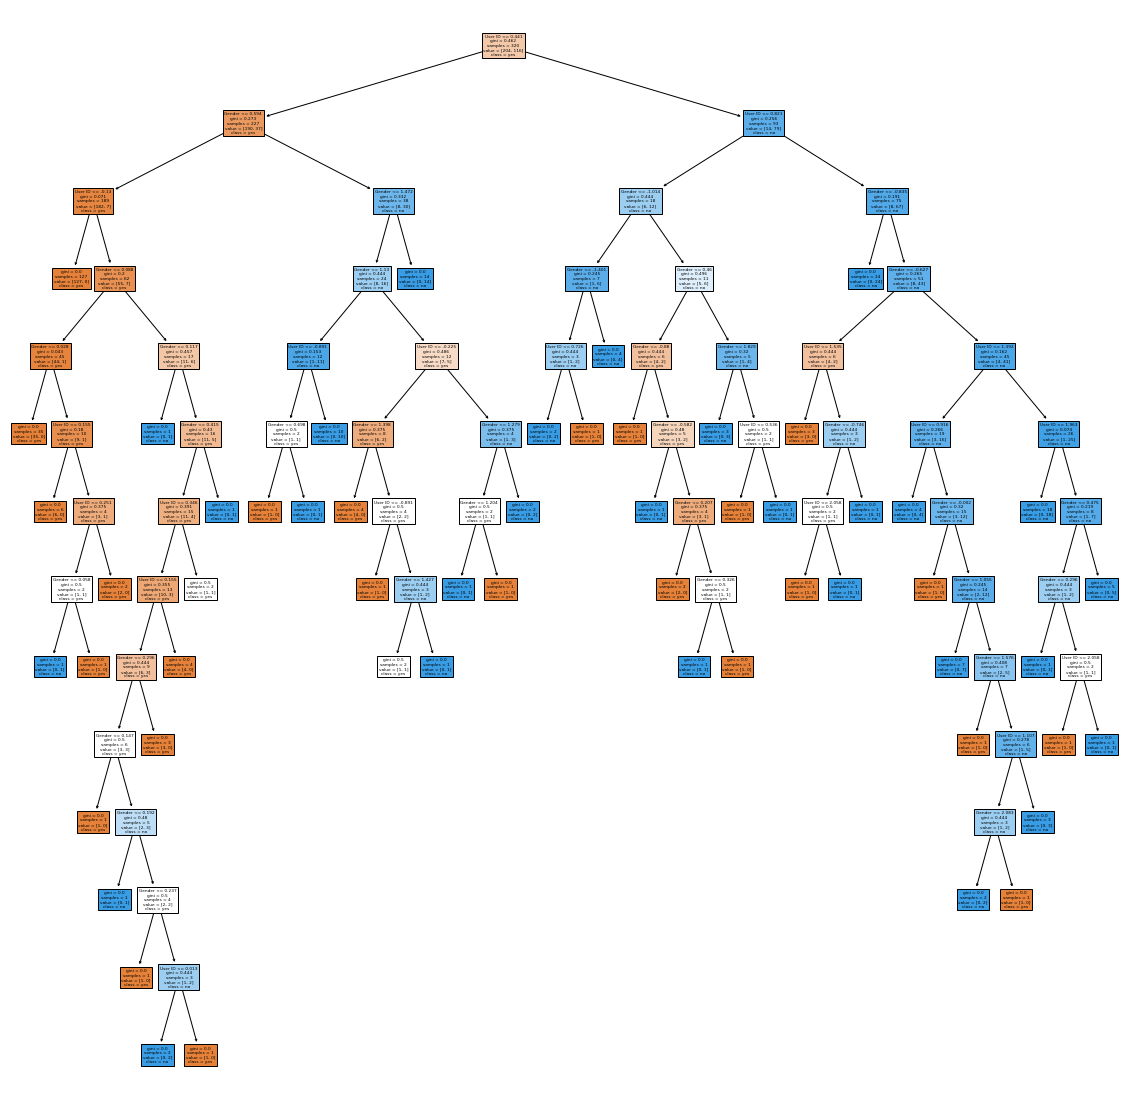

In [14]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['yes','no']
tree.plot_tree(dmodel,feature_names=features,class_names=classes,filled=True)
plt.show()

**Visualising the Test set results**

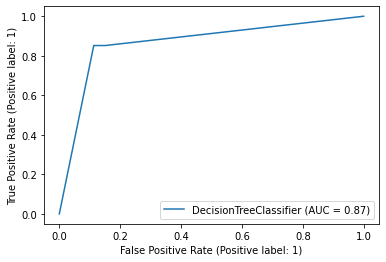

In [16]:
RocCurveDisplay.from_estimator(dmodel,x_test,y_test)